## Battle of Neighborhoods Week 2

### Part 4

#### Whole sale fabric stores ,extracting data using Yelp Api

##### Importing the required libraries

In [2]:
import pandas as pd
import requests # library to handle requests
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import json
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#!conda install -c anaconda beautifulsoup4 --yes
#from bs4 import BeautifulSoup as bs


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - seaborn


The following packages will be UPDATED:

  ca-certificates    conda-forge/label/cf201901::ca-certif~ --> anaconda::ca-certificates-2020.1.1-0
  certifi            conda-forge/label/cf201901::certifi-2~ --> anaconda::certifi-2020.4.5.2-py36_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB

# Fabric Stores Data in 5 Boroughs of NYC 

##### We will extract data from yelp.com regarding fabric shops in NYC

##### Here I am using Yelp Api to scrap data of businesses ranging upto 1000 business listings 

In [3]:

api_key='XP0lGMSL7bT4YbezIA-7F5tAgZm4zvwxganEY2a8GAvE2UclP6mp_X7CtbgZ127OhnosibFQFS0n6fotcaw-no9CxO0WQqaxlYkDHVuqaU-7dHLdSm147jObBH_sXnYx'
headers = {'Authorization': 'Bearer %s' % api_key}


#### Defining the location and key term ie."fabric store" based on the key term and location our data will be retrieved

In [4]:

location="Manhattan, New York, NY"
term='Fabric Store'


## Creating a method to scrape multiple yelp pages to scrape upto 1000 business records

In [5]:
def get_businesses(location, term, api_key):
    headers = {'Authorization': 'Bearer %s' % api_key}
    url = 'https://api.yelp.com/v3/businesses/search'

    data = []
    for offset in range(0, 1000, 50):
        params = {
            'limit': 50, 
            'location': location.replace(' ', '+'),
            'term': term.replace(' ', '+'),
            'offset': offset
        }

        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            data += response.json()['businesses']
        elif response.status_code == 400:
            print('400 Bad Request')
            break

    return data


# Retrieving Manhattan Data our location is "Manhattan NYC"

##### Calling the method to retrieve results

In [6]:
df_manhattan = pd.DataFrame.from_dict(get_businesses(location, term, api_key), orient='columns')
df_manhattan.shape
df_manhattan.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,kV00pT7Po2TCEGIVUxraNA,mood-fabrics-new-york,Mood Fabrics,https://s3-media3.fl.yelpcdn.com/bphoto/wdznL7...,False,https://www.yelp.com/biz/mood-fabrics-new-york...,337,"[{'alias': 'fabricstores', 'title': 'Fabric St...",3.5,"{'latitude': 40.753715, 'longitude': -73.990459}",[],$$,"{'address1': '225 W 37th St', 'address2': 'Fl ...",+12127305003,(212) 730-5003,1239.735489
1,uY5QCUq9IdWO6U1kAxu1AA,b-and-j-fabrics-new-york,B&J Fabrics,https://s3-media1.fl.yelpcdn.com/bphoto/5OT8nb...,False,https://www.yelp.com/biz/b-and-j-fabrics-new-y...,72,"[{'alias': 'fabricstores', 'title': 'Fabric St...",3.5,"{'latitude': 40.7535579, 'longitude': -73.9882...",[],$$$,"{'address1': '525 7th Ave', 'address2': 'Fl 2'...",+12123548150,(212) 354-8150,1104.087979
2,0JSRIoZ6C53TgQKE115Gnw,purl-soho-new-york,Purl Soho,https://s3-media2.fl.yelpcdn.com/bphoto/febHW5...,False,https://www.yelp.com/biz/purl-soho-new-york?ad...,291,"[{'alias': 'fabricstores', 'title': 'Fabric St...",4.0,"{'latitude': 40.7222118, 'longitude': -74.0010...",[],$$,"{'address1': '459 Broome St', 'address2': '', ...",+12124208796,(212) 420-8796,4634.425616
3,urqCJYMlGL6b2owD5MIwjQ,m-and-j-trimming-new-york,M&J Trimming,https://s3-media1.fl.yelpcdn.com/bphoto/vJckSl...,False,https://www.yelp.com/biz/m-and-j-trimming-new-...,188,"[{'alias': 'fabricstores', 'title': 'Fabric St...",3.5,"{'latitude': 40.75186, 'longitude': -73.9859}",[],$$,"{'address1': '1008 6th Ave', 'address2': None,...",+12127048008,(212) 704-8008,1117.649312
4,ZUh-sHaPD9KRQlJ1X-p2Mg,zarin-fabrics-new-york,Zarin Fabrics,https://s3-media3.fl.yelpcdn.com/bphoto/azPv9U...,False,https://www.yelp.com/biz/zarin-fabrics-new-yor...,59,"[{'alias': 'fabricstores', 'title': 'Fabric St...",4.5,"{'latitude': 40.7174806, 'longitude': -73.9906...",[],$$$,"{'address1': '72 Allen Street', 'address2': ''...",+12129256112,(212) 925-6112,4861.219408


## Formatting & cleaning of data


In [7]:
df_manhattan.drop(["display_phone","url","id","image_url","is_closed","transactions","price","phone","distance","alias","rating","categories","review_count"], axis = 1,inplace=True)


In [8]:
df_manhattan.rename(columns={'location':'Neighborhood'}, inplace=True)
df_manhattan.rename(columns={'name':'Store Name'}, inplace=True)
df_manhattan= df_manhattan.astype(str)


### Formating White spaces and special characters

In [9]:
df_manhattan['coordinates'] = df_manhattan['coordinates'].str.strip('{}').astype(str)
df_manhattan[['coordinates','Longitude']]=df_manhattan ['coordinates'].str.split(",",expand=True)
df_manhattan .rename(columns={'coordinates':'Latitude'}, inplace=True)
df_manhattan ['Latitude'] = df_manhattan ['Latitude'].str.replace("'latitude':",'').astype(str)
df_manhattan ['Longitude'] = df_manhattan ['Longitude'].str.replace("'longitude':",'').astype(str)
df_manhattan ['Neighborhood']="Manhattan"
df_manhattan .head()



,Store Name,Latitude,Neighborhood,Longitude
0,Mood Fabrics,40.753715,Manhattan,-73.990459
1,B&J Fabrics,40.7535579,Manhattan,-73.9882262
2,Purl Soho,40.7222118,Manhattan,-74.0010869
3,M&J Trimming,40.75186,Manhattan,-73.9859
4,Zarin Fabrics,40.7174806,Manhattan,-73.9906716


In [10]:
df_manhattan['Neighborhood'].value_counts().to_frame()

,Neighborhood
Manhattan,244


# Fabric Stores in Brooklyn

In [30]:
location2="Brooklyn, NY"

In [31]:
df_brooklyn = pd.DataFrame.from_dict(get_businesses(location2, term, api_key), orient='columns')

In [32]:

df_brooklyn.drop(["display_phone","url","id","image_url","is_closed","transactions","price","phone","distance","alias","rating","categories","review_count"], axis = 1,inplace=True)

In [51]:

df_brooklyn.rename(columns={'location':'Neighborhood'}, inplace=True)
df_brooklyn.rename(columns={'name':'Store Name'}, inplace=True)
df_brooklyn= df_brooklyn.astype(str)


In [52]:
df_brooklyn['coordinates'] = df_brooklyn['coordinates'].str.strip('{}').astype(str)
df_brooklyn[['coordinates','Longitude']]=df_brooklyn ['coordinates'].str.split(",",expand=True)
df_brooklyn.rename(columns={'coordinates':'Latitude'}, inplace=True)
df_brooklyn['Latitude'] = df_brooklyn['Latitude'].str.replace("'latitude':",'').astype(str)
df_brooklyn['Longitude'] = df_brooklyn ['Longitude'].str.replace("'longitude':",'').astype(str)
df_brooklyn['Neighborhood']="Brooklyn"
df_brooklyn .head()

,Store Name,Latitude,Neighborhood,Longitude
0,Fulton Fabrics,40.6914,Brooklyn,-73.98545
1,Brooklyn General,40.683986,Brooklyn,-74.002395
2,Beautiful Fabrics,40.64445,Brooklyn,-73.95778
3,"Nur Jahan Fabrics, LLC",40.680097,Brooklyn,-73.9482463
4,Fabric Barn Corp,40.7105711,Brooklyn,-73.9435616


In [17]:
df_brooklyn['Neighborhood'].value_counts().to_frame()

,Neighborhood
Brooklyn,294


# Fabric Stores in Bronx

In [18]:
location3="Bronx, NY"

In [19]:
df_bronx = pd.DataFrame.from_dict(get_businesses(location3, term, api_key), orient='columns')

In [20]:
df_bronx.drop(["display_phone","url","id","image_url","is_closed","transactions","price","phone","distance","alias","rating","categories","review_count"], axis = 1,inplace=True)

df_bronx.rename(columns={'location':'Neighborhood'}, inplace=True)
df_bronx.rename(columns={'name':'Store Name'}, inplace=True)
df_bronx= df_brooklyn.astype(str)



In [21]:
df_bronx['Neighborhood']="Bronx"
df_bronx.head()

,Store Name,Latitude,Neighborhood,Longitude
0,Fulton Fabrics,40.6914,Bronx,-73.98545
1,Brooklyn General,40.683986,Bronx,-74.002395
2,Beautiful Fabrics,40.64445,Bronx,-73.95778
3,"Nur Jahan Fabrics, LLC",40.680097,Bronx,-73.9482463
4,Fabric Barn Corp,40.7105711,Bronx,-73.9435616


# Fabric Stores in Queens

In [26]:
location4="Queens, NY"

In [34]:
df_queens = pd.DataFrame.from_dict(get_businesses(location4, term, api_key), orient='columns')

In [35]:
df_queens.drop(["display_phone","url","id","image_url","is_closed","transactions","price","phone","distance","alias","rating","categories","review_count"], axis = 1,inplace=True)

df_queens.rename(columns={'location':'Neighborhood'}, inplace=True)
df_queens.rename(columns={'name':'Store Name'}, inplace=True)
df_queens= df_brooklyn.astype(str)




In [36]:
df_queens['coordinates'] = df_queens['coordinates'].str.strip('{}').astype(str)

In [37]:
df_queens[['coordinates','Longitude']]=df_queens['coordinates'].str.split(",",expand=True)
df_queens.rename(columns={'coordinates':'Latitude'}, inplace=True)
df_queens['Latitude'] = df_queens['Latitude'].str.replace("'latitude':",'').astype(str)
df_queens['Longitude'] = df_queens['Longitude'].str.replace("'longitude':",'').astype(str)



In [38]:
df_queens['Neighborhood']="Queens"

In [39]:
df_queens.head()

,Store Name,Latitude,Neighborhood,Longitude
0,Fulton Fabrics,40.6914,Queens,-73.98545
1,Brooklyn General,40.683986,Queens,-74.002395
2,Beautiful Fabrics,40.64445,Queens,-73.95778
3,"Nur Jahan Fabrics, LLC",40.680097,Queens,-73.9482463
4,Fabric Barn Corp,40.7105711,Queens,-73.9435616


# Fabric Stores in Staten Island

In [40]:
location5="Staten Island, NY"

In [41]:
df_statenisland = pd.DataFrame.from_dict(get_businesses(location5, term, api_key), orient='columns')

In [42]:
df_statenisland.shape

(111, 16)

In [43]:
df_statenisland .drop(["display_phone","url","id","image_url","is_closed","transactions","price","phone","distance","alias","rating","categories","review_count"], axis = 1,inplace=True)
df_statenisland .rename(columns={'location':'Neighborhood'}, inplace=True)
df_statenisland .rename(columns={'name':'Store Name'}, inplace=True)
df_statenisland = df_statenisland .astype(str)


In [44]:
df_statenisland ['coordinates'] = df_statenisland ['coordinates'].str.strip('{}').astype(str)
df_statenisland [['coordinates','Longitude']]=df_statenisland ['coordinates'].str.split(",",expand=True)
df_statenisland .rename(columns={'coordinates':'Latitude'}, inplace=True)
df_statenisland ['Latitude'] = df_statenisland ['Latitude'].str.replace("'latitude':",'').astype(str)
df_statenisland ['Longitude'] = df_statenisland ['Longitude'].str.replace("'longitude':",'').astype(str)

df_statenisland ['Neighborhood']="Staten Island"
df_statenisland .head()

,Store Name,Latitude,Neighborhood,Longitude
0,Michaels - Temporarily Closed,40.576048,Staten Island,-74.165096
1,House of Fashion,40.630071,Staten Island,-74.142466
2,Michaels - Temporarily Closed,40.625252,Staten Island,-74.13693
3,Fabric Warehouse Direct,40.60112,Staten Island,-74.28091
4,Fulton Fabrics,40.6914,Staten Island,-73.98545


# Combining All dataframes to plot the graph & map

In [53]:
df = pd.concat([df_manhattan, df_brooklyn,df_queens,df_bronx,df_statenisland], ignore_index=True)


In [54]:
df.head()

,Store Name,Latitude,Neighborhood,Longitude
0,Mood Fabrics,40.753715,Manhattan,-73.990459
1,B&J Fabrics,40.7535579,Manhattan,-73.9882262
2,Purl Soho,40.7222118,Manhattan,-74.0010869
3,M&J Trimming,40.75186,Manhattan,-73.9859
4,Zarin Fabrics,40.7174806,Manhattan,-73.9906716


In [55]:
df['Neighborhood'].value_counts().to_frame()

,Neighborhood
Bronx,294
Queens,294
Brooklyn,294
Manhattan,244
Staten Island,111


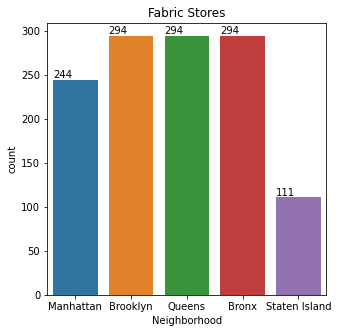

In [58]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Neighborhood',data=df)
ax.set_title("Fabric Stores")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

## Foursquare API Credentials for plotting the stores

In [59]:
CLIENT_ID = 'IXVOS33QFRBPWU50M52J3XKIDQM5MWUSIJMXOEKQ3HXR5BHV' # your Foursquare ID
CLIENT_SECRET = 'ILTJURRBCWL0CELBNM23CRNIGD1KBZDMEEKOHXPDFXEYE4CM' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IXVOS33QFRBPWU50M52J3XKIDQM5MWUSIJMXOEKQ3HXR5BHV
CLIENT_SECRET:ILTJURRBCWL0CELBNM23CRNIGD1KBZDMEEKOHXPDFXEYE4CM


In [60]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

In [61]:
df["Latitude"] = pd.to_numeric(df["Latitude"], downcast="float")
df["Longitude"] = pd.to_numeric(df["Longitude"], downcast="float")
#df[['latitude', 'longitude']].astype(float)

In [62]:

address = 'New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7127281 -74.0060152


In [76]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

folium.features.CircleMarker(
    [latitude, longitude],
    radius=50,
    color='red',
    popup='New York City',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)


for lat, lng, store, borough in zip(df['Latitude'], df['Longitude'], df['Store Name'], df['Neighborhood']):
    label = '{}, {}'.format(store, borough)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        label=store,
        fill = True,
        fill_color='white',
        fill_opacity=0.6
    ).add_to(venues_map)
    # display map
venues_map